# **Store Sales Prediction**

## **Problem Statement:**

As the success of the retail store depends upon its sales.More the sales made more is the revenue.

The supermarket has several outlets we need to to predict the sales which they can expect.

## **Application of predicting the sales:**

We can tell the company what are all the challenges they may face.

What are the brands or products which is sold the most.

This helps sales team to understand which product to sell & which product to promote.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import required libraries 

In [ ]:
#importing required libraries 
import numpy as np                                          # used for working with arrays 
import pandas as pd                                         # creating a database 
import matplotlib.pyplot as plt                             # for the visualisation
import seaborn as sns                                       # for the visualisation
from sklearn import preprocessing                           # to convert raw data into clean dataset 
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # it is used to scale the variables 
from sklearn.model_selection import train_test_split            # to evaluate how well our machine learning model performs
from sklearn.linear_model import LinearRegression               # for finding out the relationship between variables
from sklearn.metrics import mean_squared_error                  # tells about how close a regression line is to a set of points
from sklearn.metrics import mean_absolute_error                 # It measures accuracy for continuous variables
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore')

## Load the dataset

In [ ]:
df_storesales = pd.read_csv('/content/drive/MyDrive/ML/Data/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df_storesales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#cheking the shape of dataframe
df_storesales.shape

(14204, 12)

In [ ]:
#checking info
df_storesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df_storesales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#check if any misisng values in any feature and identify those features
print(df_storesales.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


In [ ]:
df_storesales = df_storesales.replace(to_replace = "@!#$%^&*()<>?/|}{~:?", value = np.nan)

In [ ]:
#check if any misisng values in any feature and identify those features
print(df_storesales.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


In [ ]:
df_storesales['Item_Outlet_Sales'].fillna(int(df_storesales['Item_Outlet_Sales'].mean()), inplace=True)

In [ ]:
print(df_storesales.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
df_storesales1 = df_storesales.copy()

In [ ]:
# creating list of object datatype columns
obj=[]
for i in df_storesales1.select_dtypes('object').columns:
  obj.append(i)

In [ ]:
for i in obj:                    #coverting it into categorical
  df_storesales1[i]=df_storesales1[i].astype('category')
df_storesales1.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [ ]:
category=[]   #creating list of all categorical columns 
for i in df_storesales1.select_dtypes('category').columns:
  category.append(i)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for i in category:
  df_storesales1[i] = label_encoder.fit_transform(df_storesales1[i])
df_storesales1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
df_storesales1.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
corr=df_storesales1.corr()
corr.style.background_gradient(cmap='PuBuGn_r')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010262
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105063
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int64','float64']
  new_storesales_df = df_storesales1.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_storesales_df.to_numpy()),columns=new_storesales_df.columns)
  return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process.It shrinks the data within the given range  0-1
scale = 'minmax'       
df_storesales1_scaled=feature_scale(scale)
df_storesales1_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164529
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164529
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164529
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164529


In [ ]:
df_storesales1_scaled2  = df_storesales1_scaled.copy()

In [ ]:
df_storesales1_scaled2.drop(df_storesales1_scaled2.columns[[11]], axis=1, inplace=True)
a = df_storesales.iloc[:,[11]]
df_scaled = pd.concat([a, df_storesales1_scaled2], axis=1)
df_scaled

,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3735.1380,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,443.4228,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,2097.2700,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,732.3800,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,994.7052,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,2181.0000,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
14200,2181.0000,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667
14201,2181.0000,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333
14202,2181.0000,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333


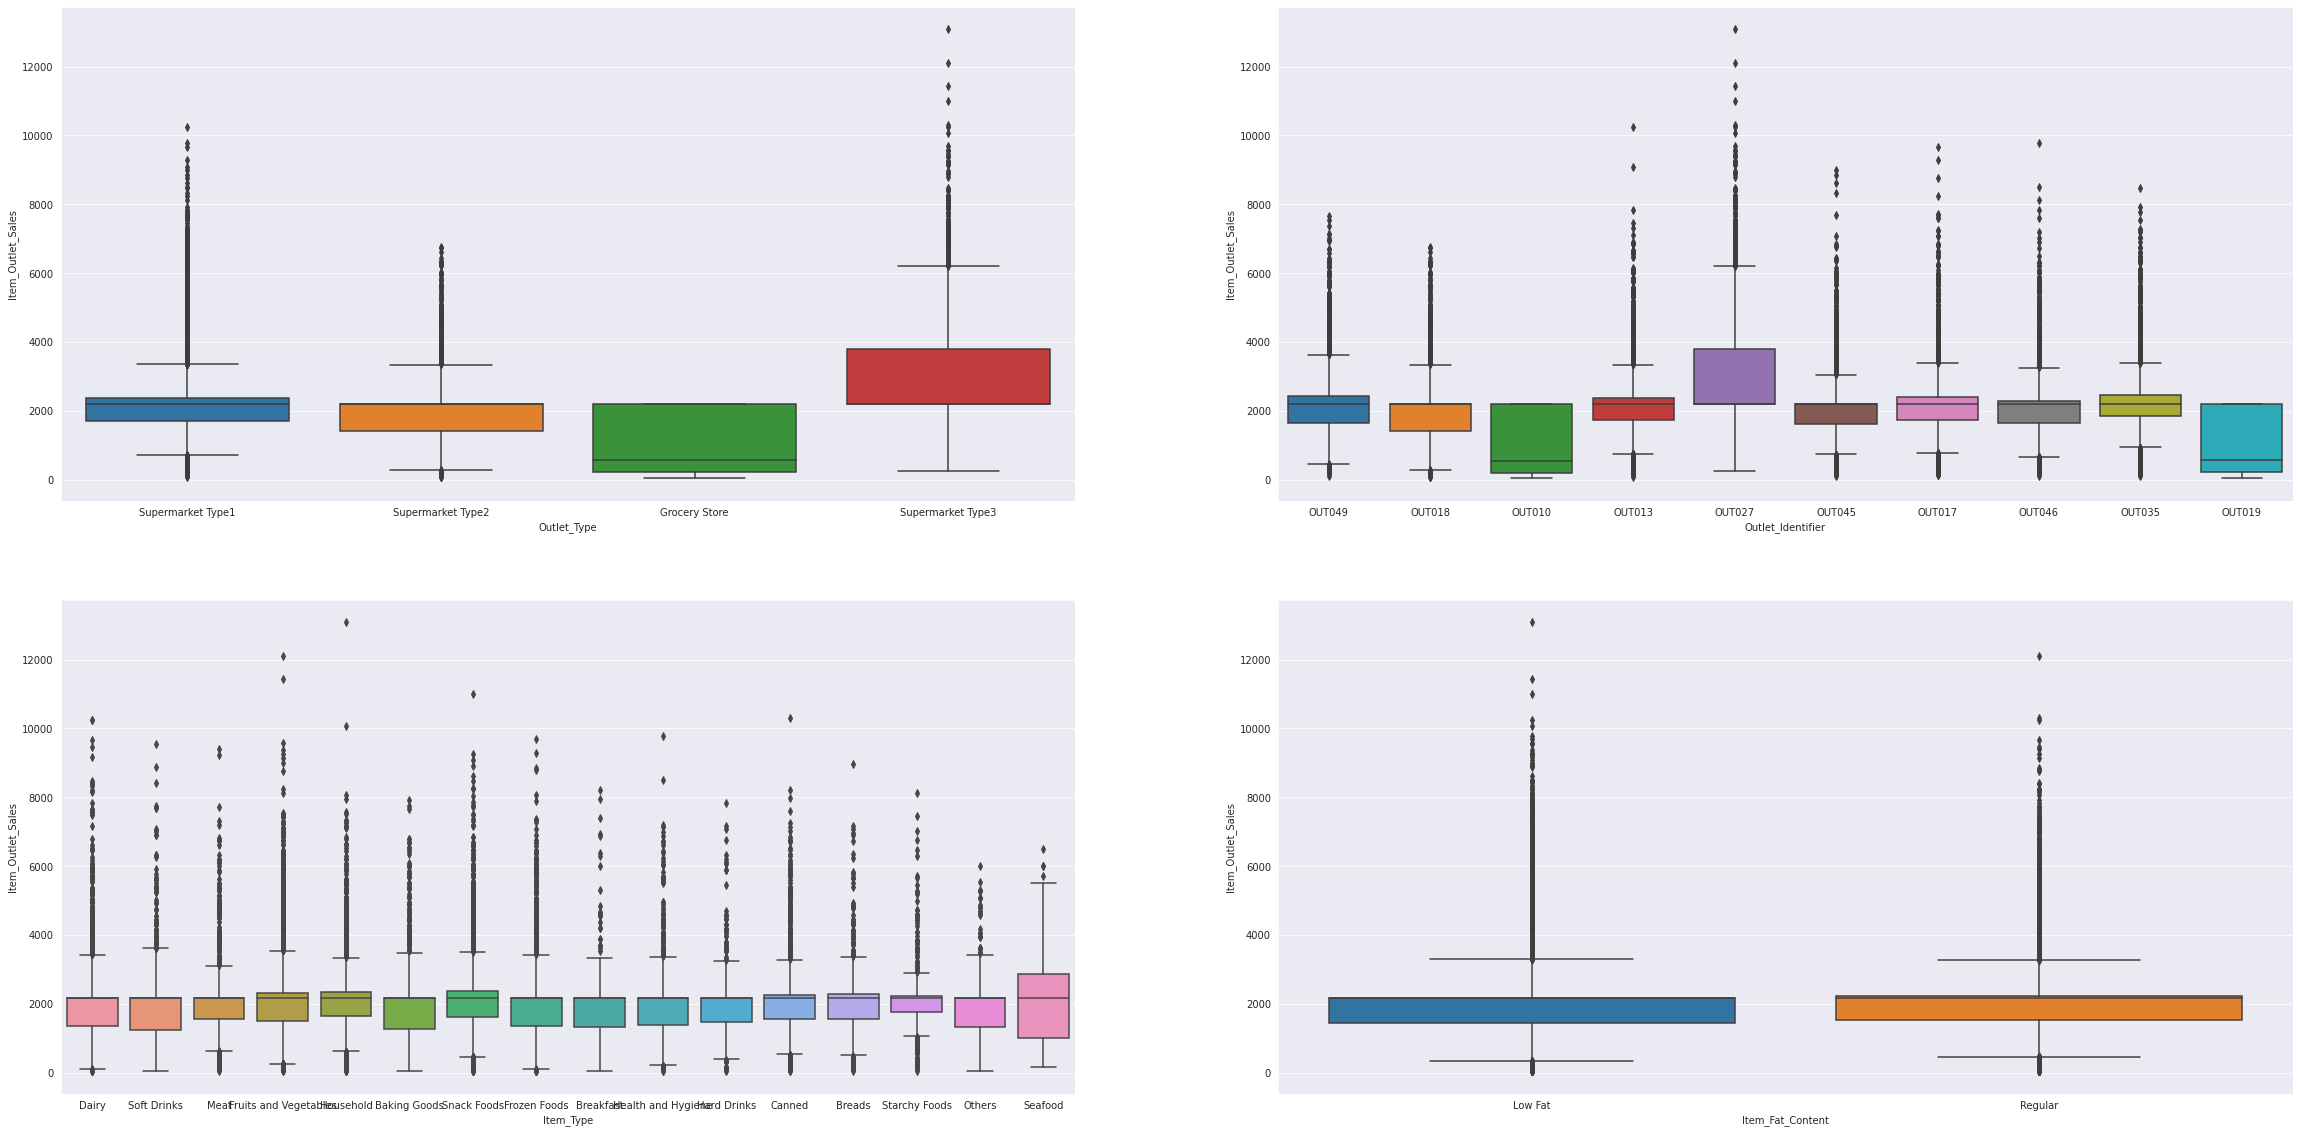

In [ ]:
sb.set_style('darkgrid')
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
sb.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_storesales)
plt.subplot(2,2,2)
sb.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df_storesales)
plt.subplot(2,2,3)
sb.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df_storesales)
plt.subplot(2,2,4)
sb.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_storesales)


### 1.Supermarket type 3 has highest sales

### 2.Out027 has the highest sales.

### 3.low fat products has highest sales as compared to regular.



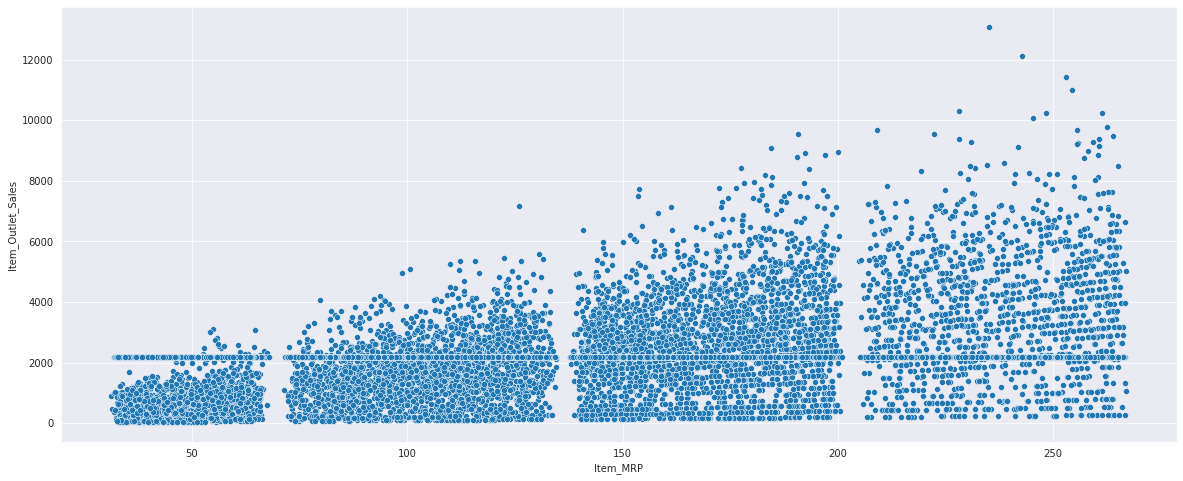

In [ ]:
plt.figure(figsize =(20,8))
sb.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df_storesales)

### Items MRP ranging from 200-250 dollars is having high Sales

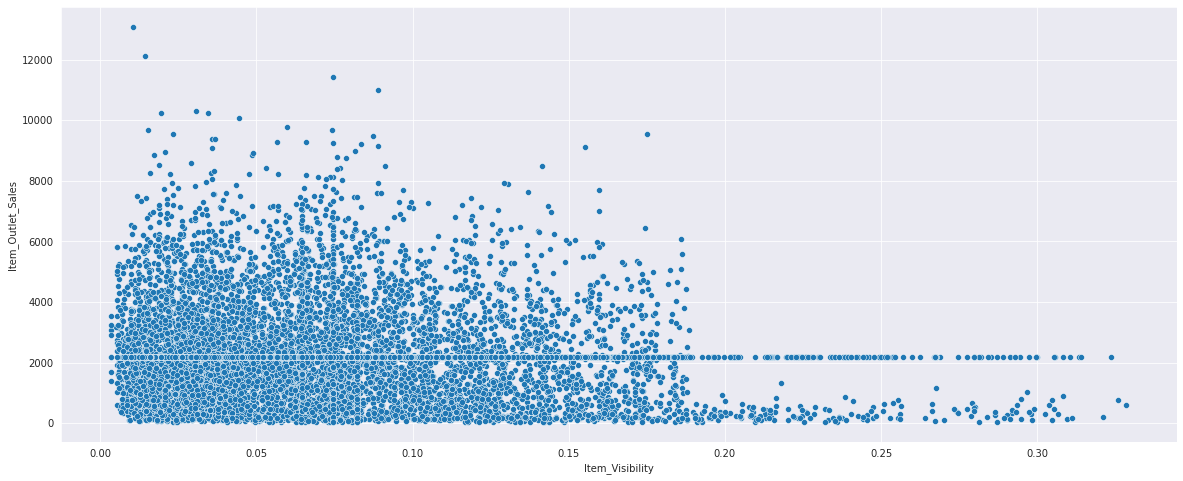

In [ ]:
plt.figure(figsize =(20,8))
sb.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df_storesales)

### Item visibilty between 0.1-0.17 has the sales upto 10000

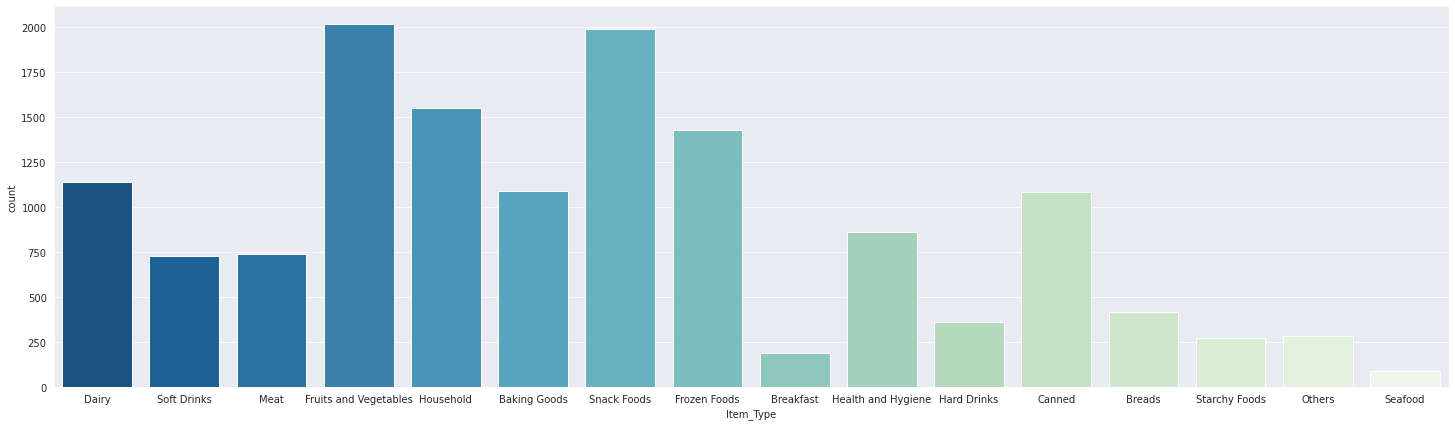

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=df_storesales, palette='GnBu_r')

### Fruits and Vegetables are largely sold.

### Snack Foods too have good sales.

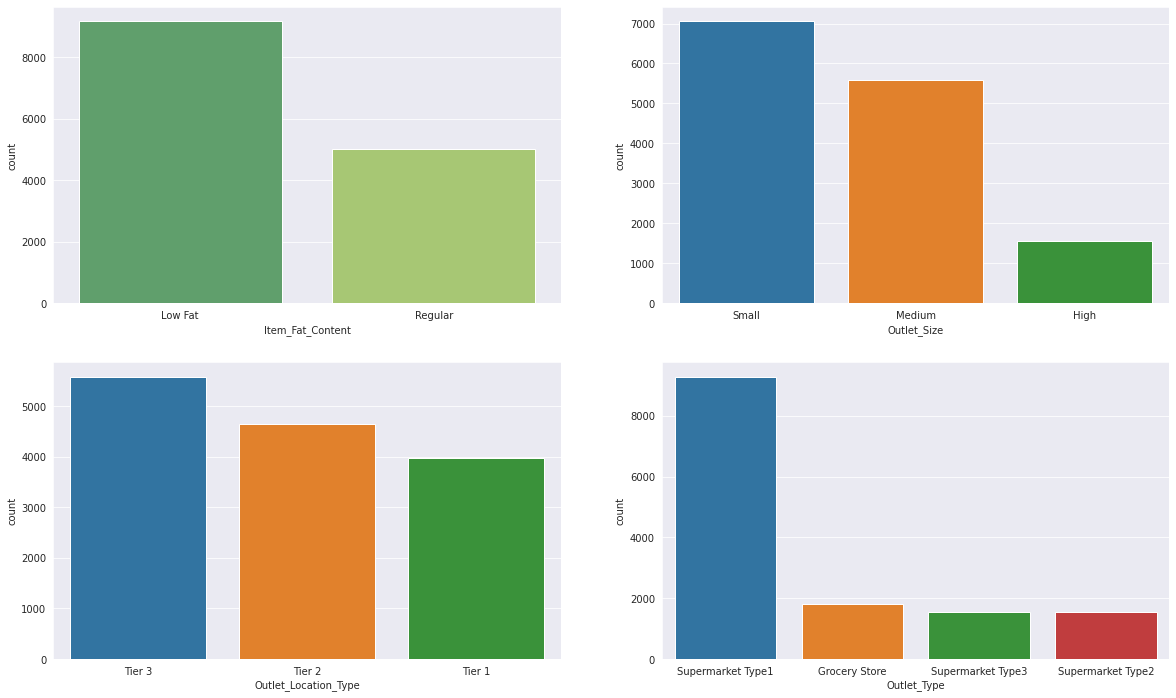

In [ ]:
sb.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sb.countplot('Item_Fat_Content', data = df_storesales,palette='summer')
plt.subplot(2,2,2)
sns.countplot('Outlet_Size', data = df_storesales,order = df_storesales['Outlet_Size'].value_counts().index)
plt.subplot(2,2,3)
sns.countplot('Outlet_Location_Type', data = df_storesales, order = df_storesales['Outlet_Location_Type'].value_counts().index )
plt.subplot(2,2,4)
sns.countplot('Outlet_Type', data = df_storesales, order = df_storesales['Outlet_Type'].value_counts().index )

### 1. small outlet stores has highets sales.

### 2. Tire 3 outlet stores has highest sales 

## Training the model

### Simple linear regression 

In [ ]:
X=df_storesales1_scaled[['Item_MRP', 'Outlet_Identifier','Outlet_Type','Item_Visibility']]
y=df_storesales1_scaled['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
s_model = LinearRegression().fit(X_train, y_train)  #fitting the linear regression to the model 
s_r_sq1=s_model.score(X_train, y_train)

In [ ]:
print('coefficient of determination:', s_r_sq1)  # to check the accuracy of the model
print('intercept:', s_model.intercept_)         # y intercept
print('slope:', s_model.coef_)                  # slope value 

coefficient of determination: 0.3029183543801137
intercept: 0.02924869184768164
slope: [ 0.17200619  0.03013423  0.11265165 -0.02340794]


In [ ]:
y_pred = s_model.predict(X_test)   # to predict the accuracy of the model using x_text
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.19272783 0.17680339 0.11794575 ... 0.07722585 0.18290688 0.03558303]


In [ ]:
MSE1=mean_squared_error(y_test, y_pred)
MAE1=mean_absolute_error(y_test,y_pred)
RMSE1 = mean_squared_error(y_test, y_pred, squared=False)
print(MSE1, MAE1, RMSE1)

0.006913152620133927 0.06265921855269507 0.0831453704071004


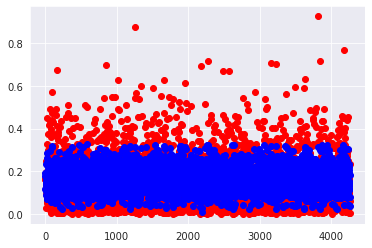

In [ ]:
#plotting actual and pred values 
x_f = list(np.arange(0,len(y_test)))
plt.scatter(x_f,y_test,color='red')
plt.scatter(x_f,y_pred,color='blue')

## Decision tree Regressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

# Fitting the model on our trained dataset.
dtm.fit(X_train,y_train)
s_r_sq2 = dtm.score(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.35364995035273994
R-Squared on test dataset=0.36046295473691015


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred= cross_val_predict(dtm, X_test, y_test )
print("The predicted outcomes of test data are as follows :\n")
print(y_pred)

The predicted outcomes of test data are as follows :

[0.18514153 0.08528284 0.10180482 ... 0.11308947 0.22122074 0.06404538]


In [ ]:
#checking the error values 
MSE2=mean_squared_error(y_test, y_pred)
MAE2=mean_absolute_error(y_test,y_pred)
RMSE2 = mean_squared_error(y_test, y_pred, squared=False)
print(MSE2, MAE2, RMSE2)

0.006591285514070295 0.06146126776149276 0.08118673237709653


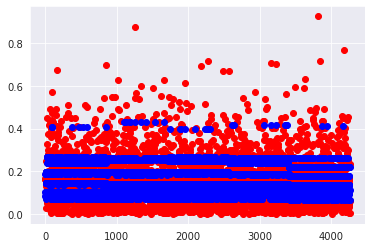

In [ ]:
#plotting actual and pred values 
x_f = list(np.arange(0,len(y_test)))
plt.scatter(x_f,y_test,color='red')
plt.scatter(x_f,y_pred,color='blue')

## Random Forest Regressor

In [ ]:
from sklearn.datasets import make_regression  
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)
a = regression_rf.fit(X_train, y_train)
s_r_sq3 = a.score(X_train, y_train)
print("The training r2 is %.2f:" % a.score(X_train, y_train))
y_train_pred = a.predict(X_train)
print("MSE : %.2f" % mean_squared_error(y_train, y_train_pred))
print("MAE : %.2f" % mean_absolute_error(y_train, y_train_pred))
print("RMSE : %.2f" % mean_squared_error(y_train, y_train_pred,squared=False))

The training r2 is 0.38:
MSE : 0.01
MAE : 0.06
RMSE : 0.08


In [ ]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)
a = regression_rf.fit(X_test, y_test)
print("The test r2 is %.2f:" % a.score(X_test, y_test))
y_test_pred = a.predict(X_test)
print("MSE : %.2f" % mean_squared_error(y_test, y_test_pred))
print("MAE : %.2f" % mean_absolute_error(y_test, y_test_pred))
print("RMSE : %.2f" % mean_squared_error(y_test, y_test_pred,squared=False))

The test r2 is 0.40:
MSE : 0.01
MAE : 0.06
RMSE : 0.08


In [ ]:
regression_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100)
a = regression_rf.fit(X_train, y_train)
print("The training r2 is %.2f:" % a.score(X_train, y_train))
y_pred = a.predict(X_test)
print("MSE : %.2f" % mean_squared_error(y_test, y_pred))
print("MAE : %.2f" % mean_absolute_error(y_test, y_pred))
print("RMSE : %.2f" % mean_squared_error(y_test, y_pred,squared=False))

The training r2 is 0.38:
MSE : 0.01
MAE : 0.06
RMSE : 0.08


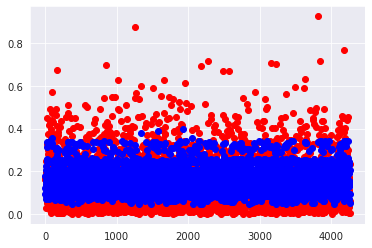

In [ ]:
#plotting actual and pred values 
x_f = list(np.arange(0,len(y_test)))
plt.scatter(x_f,y_test,color='red')
plt.scatter(x_f,y_pred,color='blue')

### AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# evaluate the model
ada = AdaBoostRegressor(random_state=1500, n_estimators=100)
ada.fit(X_train,y_train)
s_r_sq4 = ada.score(X_train,y_train)
print("R-Squared of train dataset={}".format(ada.score(X_train,y_train)))

ada.fit(X_test,y_test)
print("R-Squared of test dataset={}".format(ada.score(X_test,y_test)))

R-Squared of train dataset=0.24586872134932503
R-Squared of test dataset=0.26896166828974444


In [ ]:
y_test_pred = a.predict(X_test)
print("MSE : %.2f" % mean_squared_error(y_test, y_test_pred))
print("MAE : %.2f" % mean_absolute_error(y_test, y_test_pred))
print("RMSE : %.2f" % mean_squared_error(y_test, y_test_pred,squared=False))

MSE : 0.01
MAE : 0.06
RMSE : 0.08


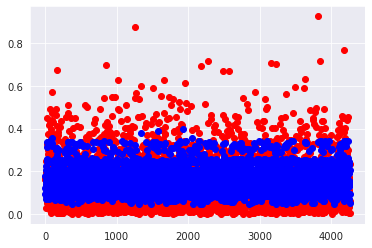

In [ ]:
#plotting actual and pred values 
x_f = list(np.arange(0,len(y_test)))
plt.scatter(x_f,y_test,color='red')
plt.scatter(x_f,y_test_pred,color='blue')

In [ ]:
R2 = [s_r_sq1,s_r_sq2,s_r_sq3,s_r_sq4]

pd.DataFrame({'Model': ['Linear regression model','Decision tree regressor model','Random Forest Regressor model','AdaBoost Regressor model'],'coefficient of determination(R2)': R2})

,Model,coefficient of determination(R2)
0,Linear regression model,0.302918
1,Decision tree regressor model,0.353650
2,Random Forest Regressor model,0.379250
3,AdaBoost Regressor model,0.245869


### **Interpretation**:Random Forest Regressor model	gives the highest accuracy i.e 0.37